In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
import payments_manager as pm
#pm.help()
#pm.reset()
pm.init() #debug=True)
cr_cp = pm.df('cr_cp')
fe_cp = pm.df('fe_cp')
#cr_cp.info()
#fe_cp.info()

df_jo = pm.df('df_jo')
#df_jo.info()
df_jo = pm.sort("df_jo", ["id_cr"]).reset_index()
df_jo = df_jo.drop(columns=['index'])
#df_jo = df_jo.drop(columns=['Mes_created_at'])
df_jo_cp = df_jo.copy()
df_jo_cp['cr_received_date'] = df_jo_cp.cash_request_received_date


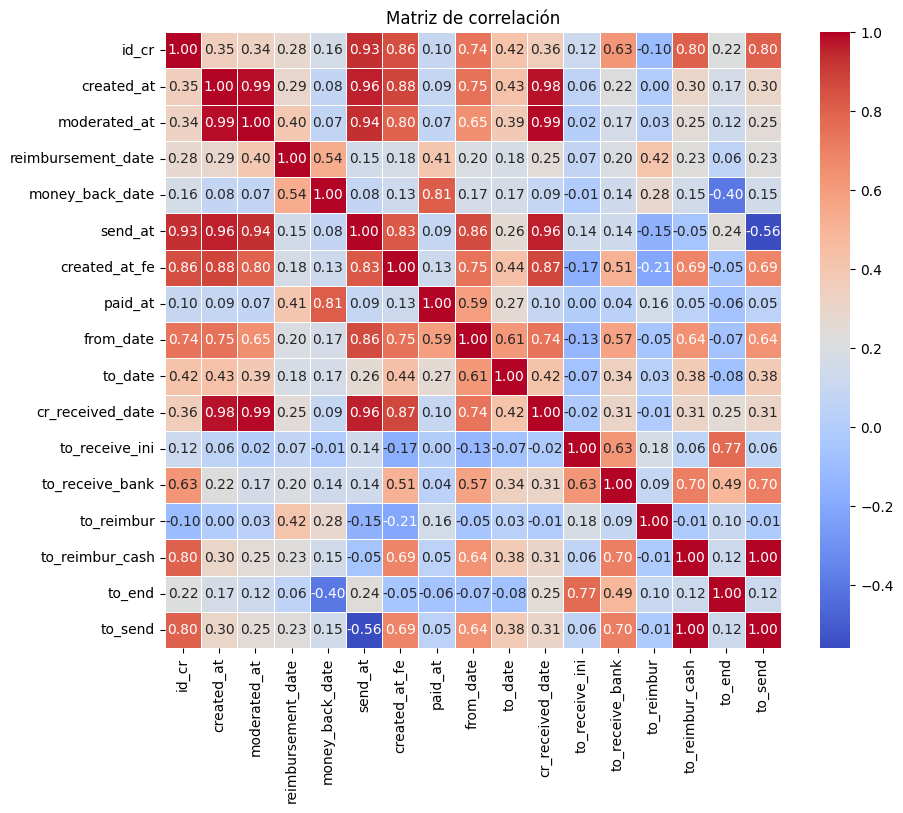

Variables altamente correlacionadas con otras:


['id_cr',
 'created_at',
 'moderated_at',
 'money_back_date',
 'send_at',
 'created_at_fe',
 'paid_at',
 'from_date',
 'cr_received_date',
 'to_reimbur_cash',
 'to_send']

In [2]:
df = pm.df('df_jo')
df = df.drop(columns=['cash_request_received_date'])
df = df.drop(columns=['active'])
df = df.drop(columns=['Mes_created_at'])
df = df.drop(columns=['fee']) #df = df.drop(columns=['total_amount'])
df = df.drop(columns=['amount'])
df = df.drop(columns=['user_id'])
df = df.drop(columns=['id_fe'])

d_list = list(df.select_dtypes(include=['datetime64']).columns)
for date in d_list:
    df[date] = pd.to_datetime(df[date]).dt.strftime('%Y%m%d').astype(float)
df_corr = df.select_dtypes(include=['number'])
matriz_corr = df_corr.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in matriz_corr.columns:
    if any((matriz_corr[column].abs() > threshold) & (matriz_corr.index != column)):
        to_drop.append(column)
print(f"Variables altamente correlacionadas con otras:")
display(to_drop)

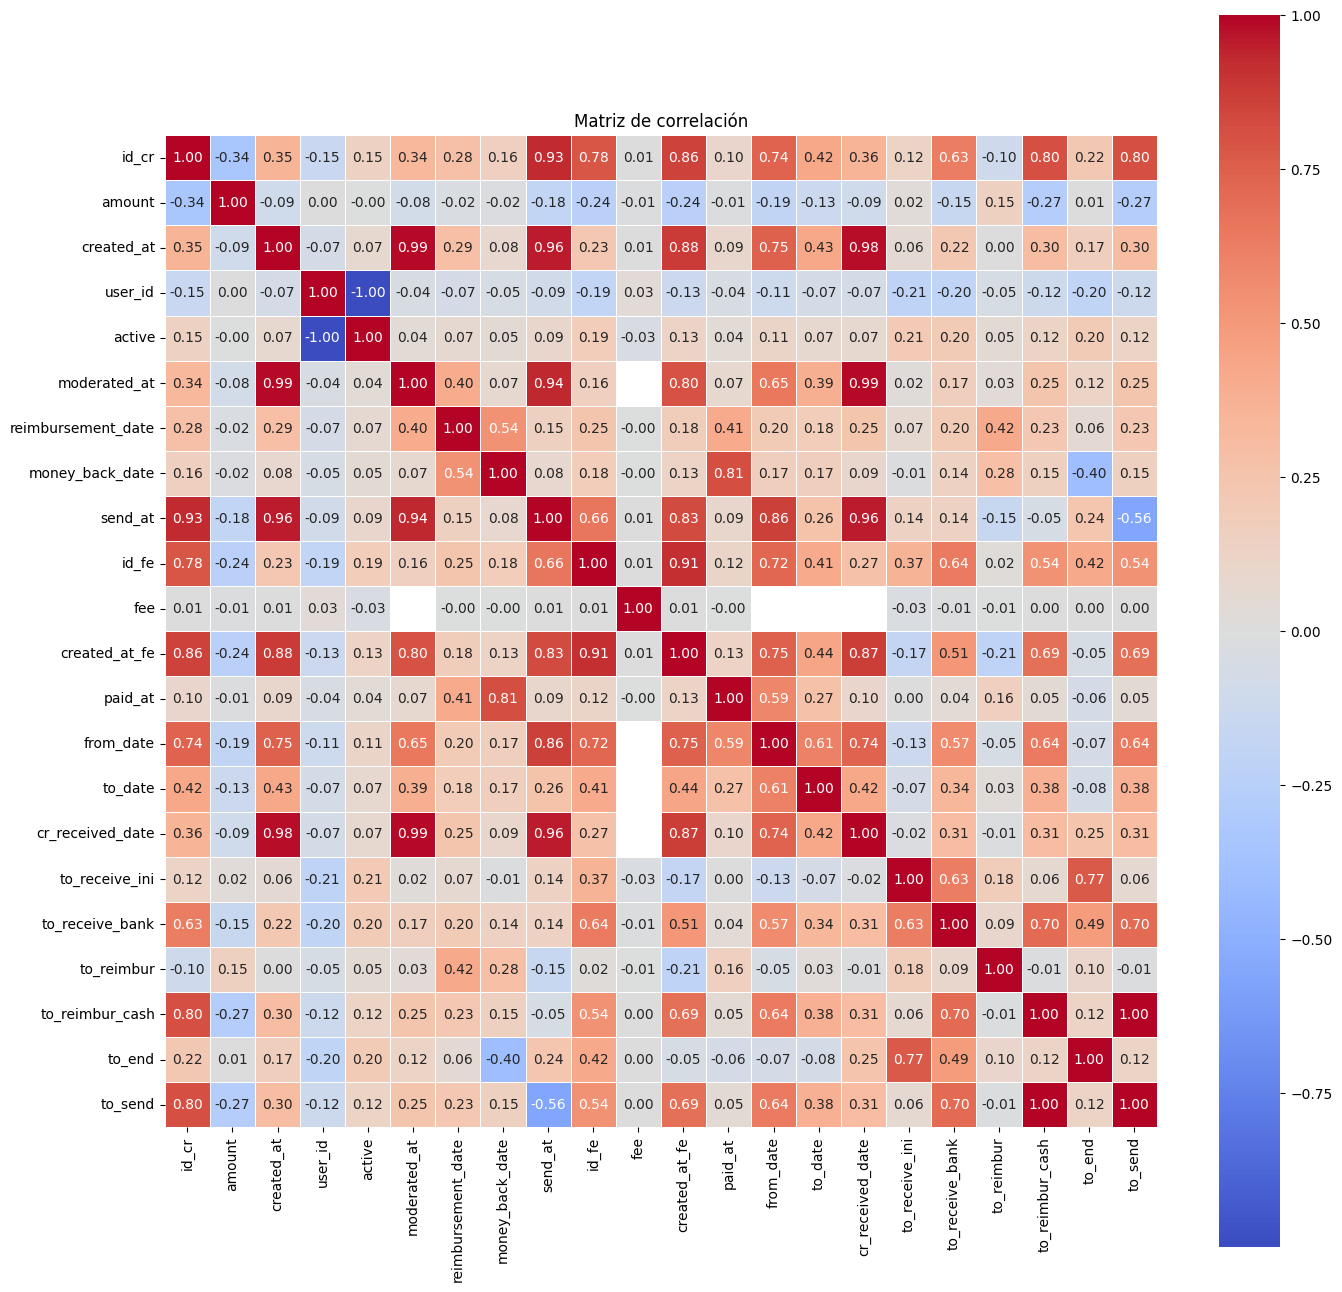

Variables altamente correlacionadas con otras:


['id_cr',
 'created_at',
 'user_id',
 'active',
 'moderated_at',
 'money_back_date',
 'send_at',
 'id_fe',
 'created_at_fe',
 'paid_at',
 'from_date',
 'cr_received_date',
 'to_reimbur_cash',
 'to_send']

In [3]:
df = pm.df('df_jo')
df = df.drop(columns=['cash_request_received_date'])
#df = df.drop(columns=['active'])
#df = df.drop(columns=['Mes_created_at'])
#df = df.drop(columns=['fee'])
#df = df.drop(columns=['total_amount'])
#df = df.drop(columns=['user_id'])

d_list = list(df.select_dtypes(include=['datetime64']).columns)
for date in d_list:
    df[date] = pd.to_datetime(df[date]).dt.strftime('%Y%m%d').astype(float)
df_corr = df.select_dtypes(include=['number'])
matriz_corr = df_corr.corr()
plt.figure(figsize=(16, 16)) 
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in matriz_corr.columns:
    if any((matriz_corr[column].abs() > threshold) & (matriz_corr.index != column)):
        to_drop.append(column)
print(f"Variables altamente correlacionadas con otras:")
display(to_drop)